In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
from sklearn.datasets import make_classification

In [7]:
X,y= make_classification(n_samples=1000,n_features=10,n_classes=2,random_state=123)

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=123)

In [11]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [13]:
y_pred = model.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [30]:
score = accuracy_score(y_test,y_pred)
print(score)

0.952


In [29]:
print(classification_report(y_test,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00       125

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



In [24]:
cm = confusion_matrix(y_test,y_pred)

<AxesSubplot:>

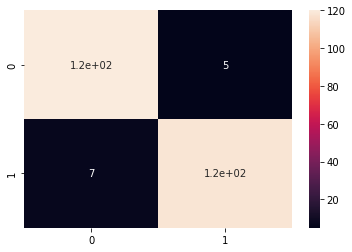

In [28]:
sns.heatmap(cm,annot=True)

### Hyperparameter Tuning and Cross Validation
#### GridSearchCV

In [60]:
penalty = ['l1','l2','elasticnet']
c_values = [100,10,1,0.1,0.01]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

In [61]:
params = dict(penalty=penalty,C=c_values,solver=solver)

In [62]:
#Grid Search CV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [63]:
cv = StratifiedKFold()
grid = GridSearchCV(estimator=model, param_grid=params, cv= cv, n_jobs=-1, scoring='accuracy')

In [64]:
grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [66]:
grid.best_params_

{'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [67]:
grid.best_score_

0.9493333333333333

In [72]:
y_pred = grid.predict(X_test)

In [73]:
score = accuracy_score(y_test,y_pred)
print(score)

0.952


#### RandomizedSearchCV

In [74]:
from sklearn.model_selection import RandomizedSearchCV

In [76]:
rand = RandomizedSearchCV(estimator=model, param_distributions=params, cv= cv, n_jobs=-1, scoring='accuracy')

In [77]:
rand.fit(X_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [100, 10, 1, 0.1, 0.01],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [78]:
y_pred = rand.predict(X_test)

In [79]:
score = accuracy_score(y_test,y_pred)
print(score)

0.952


### Multi-Class (OVR)

In [83]:
X,y= make_classification(n_samples=10000,n_features=10,n_informative = 4,n_classes=3,random_state=123)

In [84]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=123)

In [91]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='ovr')
model.fit(X_train,y_train)

LogisticRegression(multi_class='ovr')

In [92]:
y_pred = model.predict(X_test)

In [93]:
score = accuracy_score(y_test,y_pred)
print(score)

0.5172


### Imbalanced Dataset

In [96]:
X,y = make_classification(n_samples=1000,n_features=10,n_clusters_per_class=1,n_redundant=1,weights=[0.99],random_state=123)

In [97]:
from collections import Counter

In [98]:
Counter(y)

Counter({0: 984, 1: 16})

In [99]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=123)

In [104]:
penalty = ['l1','l2','elasticnet']
c_values = [100,10,1,0.1,0.01]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
class_wieght = [{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

In [107]:
params = dict(penalty=penalty,C=c_values,solver=solver,class_weight= class_wieght)
model = LogisticRegression()

In [108]:
cv = StratifiedKFold()
grid = GridSearchCV(estimator=model, param_grid=params, cv= cv, n_jobs=-1, scoring='accuracy')

In [109]:
grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [111]:
y_pred = grid.predict(X_test)

In [112]:
score = accuracy_score(y_test,y_pred)
print(score)

1.0


## ROC-AUC

In [130]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve

In [131]:
X,y=make_classification(n_samples=1000,n_features=10)

In [132]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=123)

In [133]:
model = LogisticRegression()

In [134]:
model.fit(X_train,y_train)

LogisticRegression()

In [135]:
model_prob = model.predict_proba(X_test)

In [136]:
model_prob = model_prob[:,1]

In [141]:
roc_auc_score(y_test,model_prob)

0.9619871794871796

In [144]:
fpr, tpr, theshold = roc_curve(y_test,model_prob)

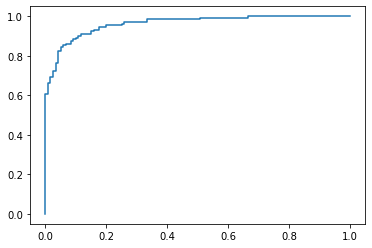

In [145]:
plt.plot(fpr,tpr)